<a href="https://colab.research.google.com/github/ZhBauyrzhan/Diploma/blob/main/Diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloaing dataset from Kaggle

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhonkebayevbauyrzhan","key":"a5a93b561438848cbcde94b156c4f8e4"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download sagnik1511/car-insurance-data

Dataset URL: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data
License(s): unknown


In [ ]:
! mkdir dataset
! unzip car-insurance-data.zip -d dataset

Archive:  car-insurance-data.zip
  inflating: dataset/Car_Insurance_Claim.csv  


# Exploring data

## Making dataframe

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dataset/Car_Insurance_Claim.csv')

In [ ]:
df.dropna(inplace=True)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8149 non-null   int64  
 1   AGE                  8149 non-null   object 
 2   GENDER               8149 non-null   object 
 3   RACE                 8149 non-null   object 
 4   DRIVING_EXPERIENCE   8149 non-null   object 
 5   EDUCATION            8149 non-null   object 
 6   INCOME               8149 non-null   object 
 7   CREDIT_SCORE         8149 non-null   float64
 8   VEHICLE_OWNERSHIP    8149 non-null   float64
 9   VEHICLE_YEAR         8149 non-null   object 
 10  MARRIED              8149 non-null   float64
 11  CHILDREN             8149 non-null   float64
 12  POSTAL_CODE          8149 non-null   int64  
 13  ANNUAL_MILEAGE       8149 non-null   float64
 14  VEHICLE_TYPE         8149 non-null   object 
 15  SPEEDING_VIOLATIONS  8149 non-null   int64 

## Exploring diagrams

In [ ]:
! pip install seaborn

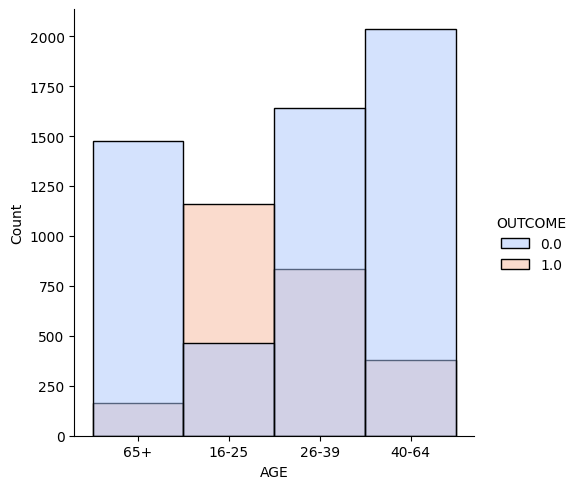

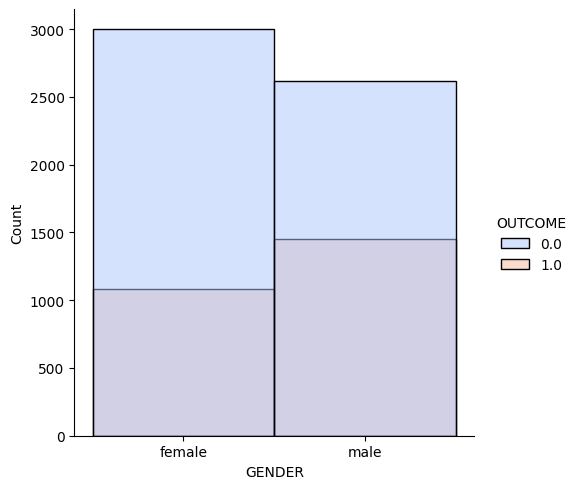

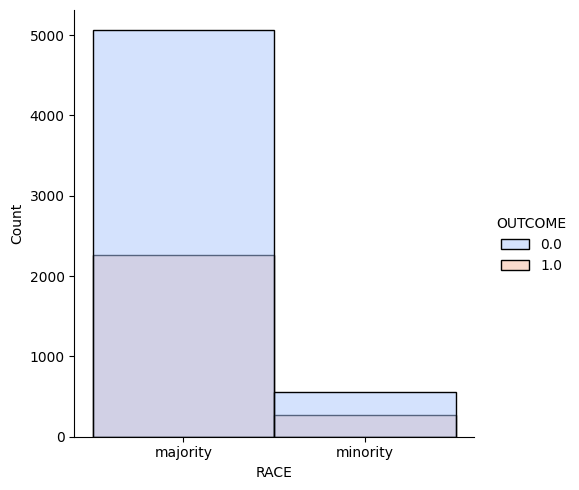

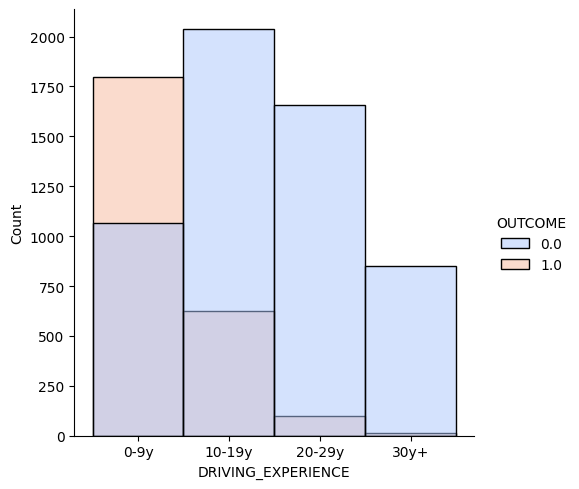

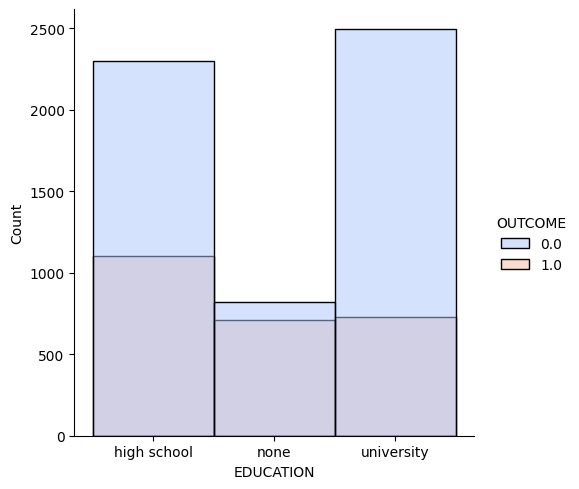

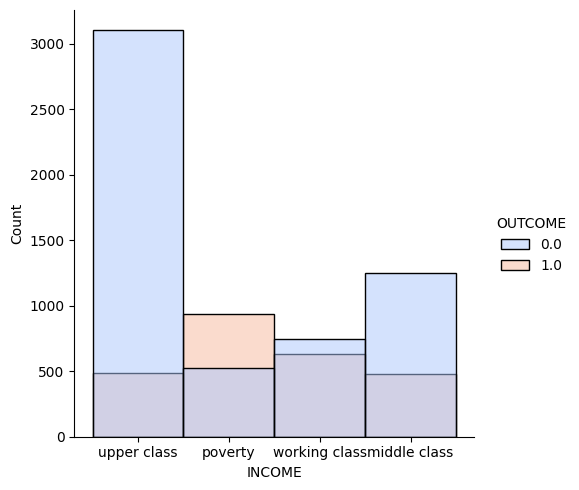

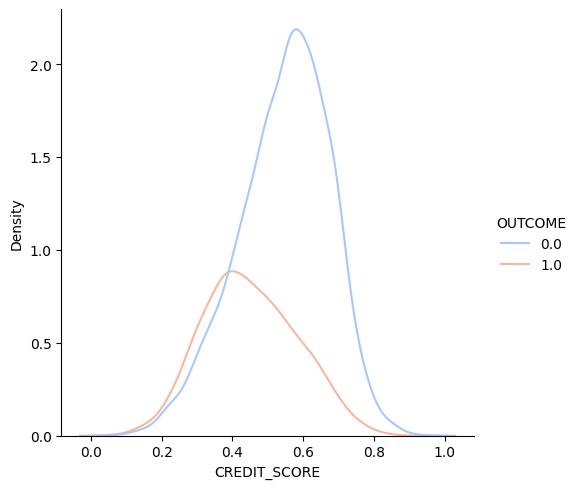

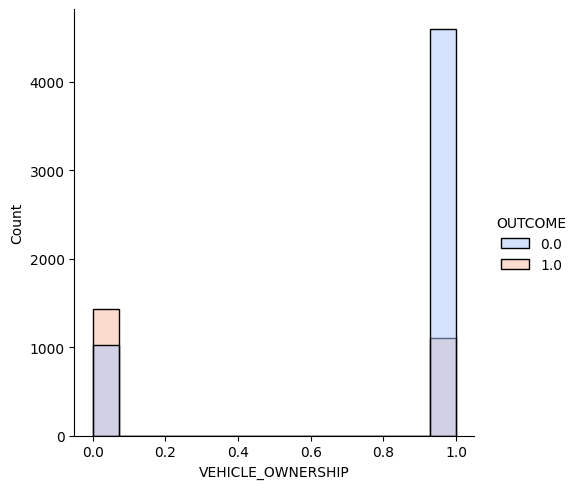

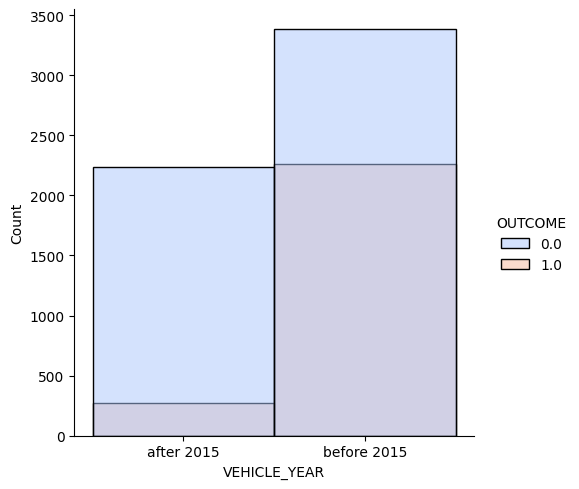

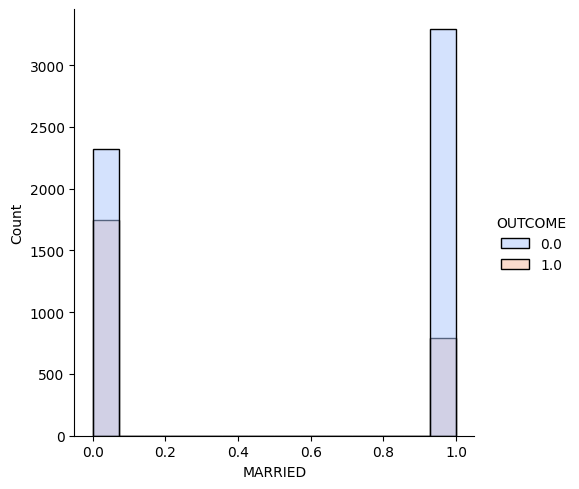

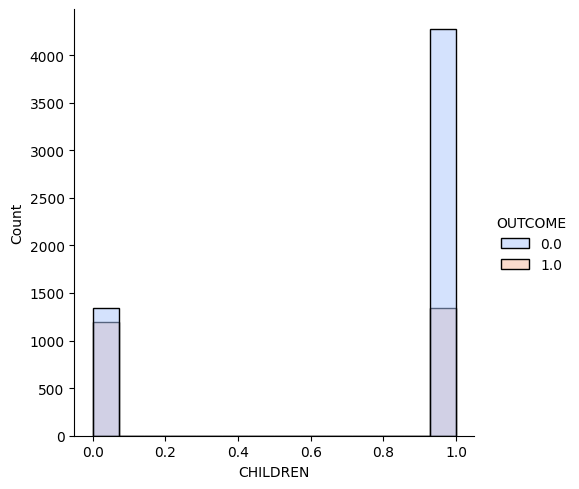

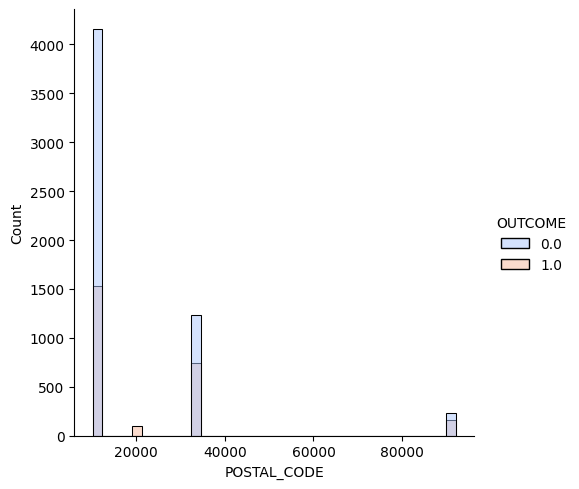

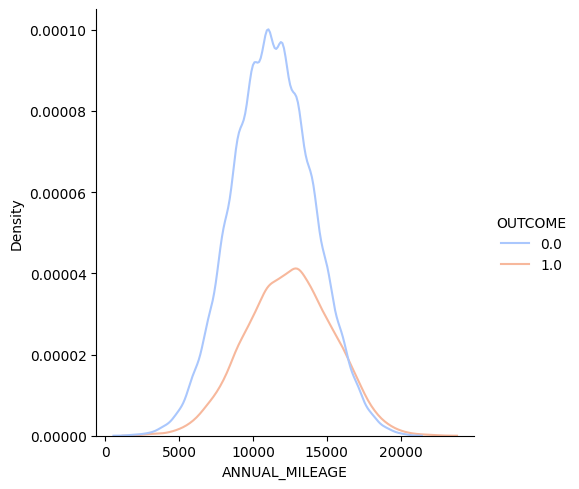

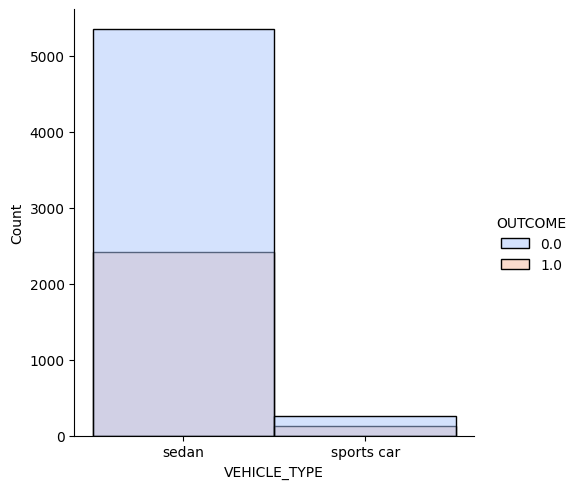

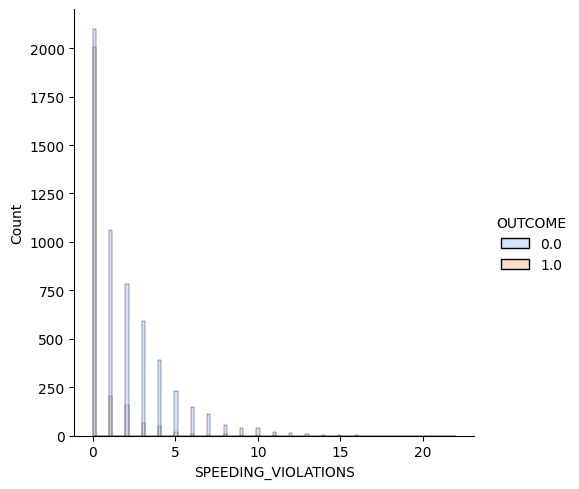

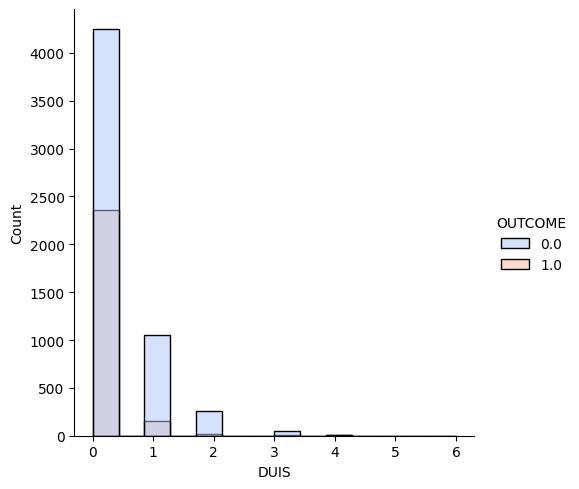

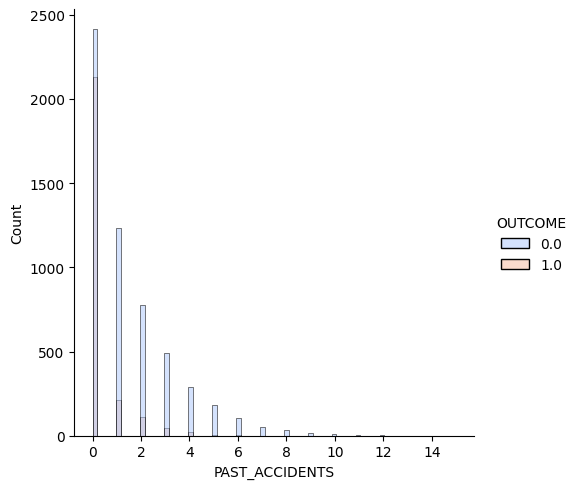

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
base_features = df.columns.values.tolist()
con_features = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']
cat_features = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR','MARRIED',
                'CHILDREN', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS',
                'PAST_ACCIDENTS']
for feature in base_features:
  if feature in ['ID', "OUTCOME"]:
    continue
  if feature in con_features:
    sns.displot(data=df, hue="OUTCOME", x=feature, kind="kde", palette='coolwarm')
  else:
    sns.displot(df, x=feature,  hue="OUTCOME", palette='coolwarm')

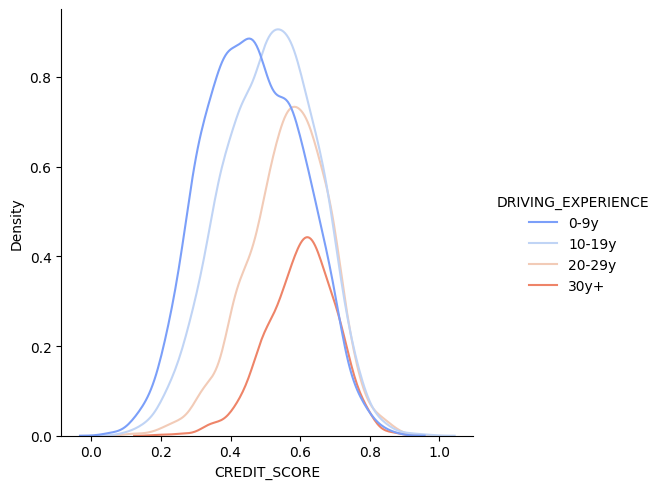

In [ ]:
sns.displot(data=df, hue="DRIVING_EXPERIENCE", x="CREDIT_SCORE", kind="kde", palette='coolwarm')

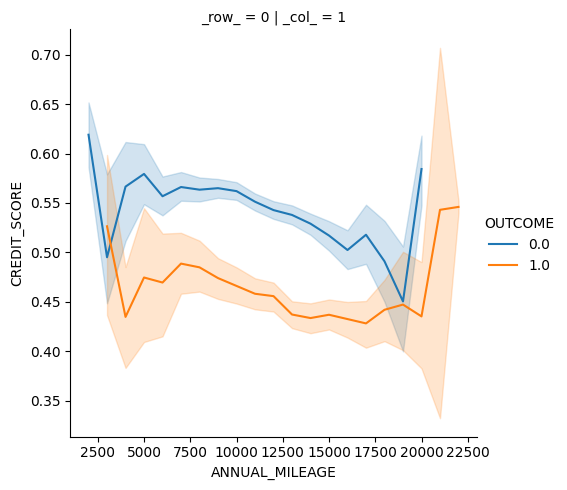

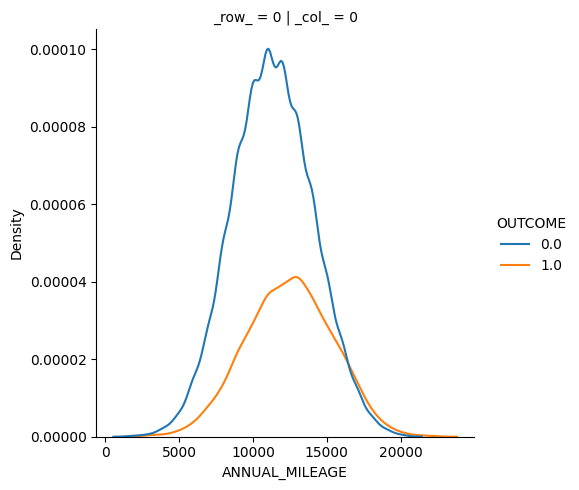

In [ ]:
sns.relplot(df, x="ANNUAL_MILEAGE", y="CREDIT_SCORE", row=0, col=1, hue="OUTCOME", kind="line")
sns.displot(df, x="ANNUAL_MILEAGE",  row=0, col=0, hue="OUTCOME", kind="kde")

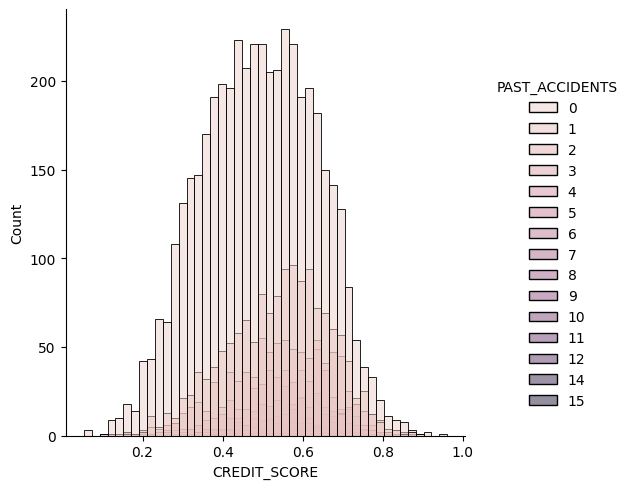

In [ ]:
sns.displot(df, x="CREDIT_SCORE", hue="PAST_ACCIDENTS")

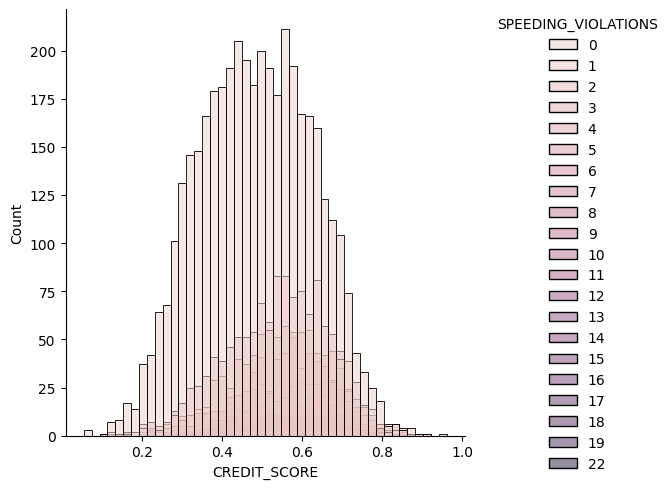

In [ ]:
sns.displot(df, x="CREDIT_SCORE", hue="SPEEDING_VIOLATIONS")

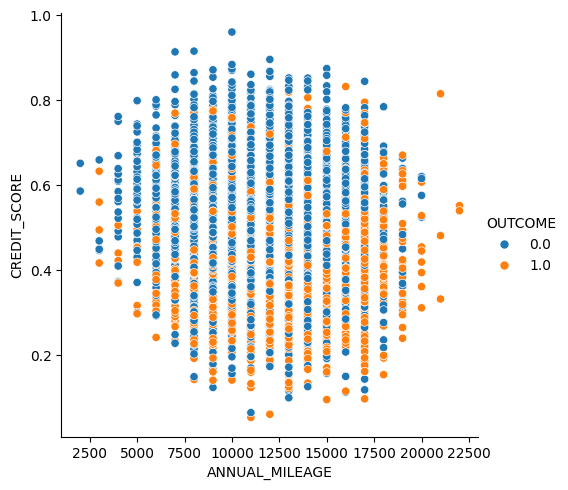

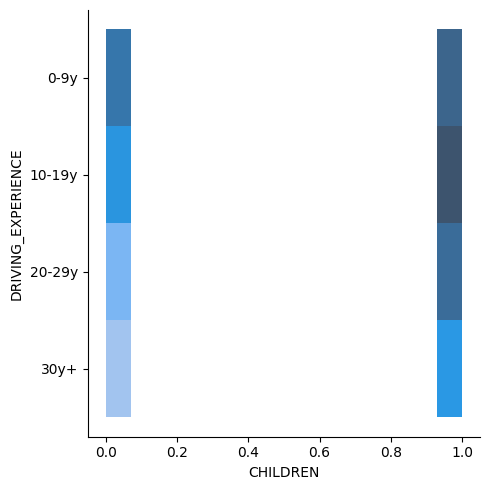

In [ ]:
sns.relplot(df, x="ANNUAL_MILEAGE", y="CREDIT_SCORE", kind="scatter", hue="OUTCOME")
sns.displot(df, x="CHILDREN", y="DRIVING_EXPERIENCE")

# Normalization

In [ ]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
init_df = df.copy(deep=True)

In [ ]:
df = init_df.copy(deep=True)
for feature in ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'INCOME', 'EDUCATION', 'VEHICLE_YEAR', 'VEHICLE_TYPE']:
  for new_feature in df[feature].unique():
    df[new_feature] = df[feature].apply(lambda x: 1 if x == new_feature else 0)
  df.drop(feature, axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)
df.drop('POSTAL_CODE', axis=1, inplace=True)
print(df.columns.values)
df.head()

['CREDIT_SCORE' 'VEHICLE_OWNERSHIP' 'MARRIED' 'CHILDREN' 'ANNUAL_MILEAGE'
 'SPEEDING_VIOLATIONS' 'DUIS' 'PAST_ACCIDENTS' 'OUTCOME' '65+' '16-25'
 '26-39' '40-64' 'female' 'male' 'majority' 'minority' '0-9y' '10-19y'
 '20-29y' '30y+' 'upper class' 'poverty' 'working class' 'middle class'
 'high school' 'none' 'university' 'after 2015' 'before 2015' 'sedan'
 'sports car']


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,65+,...,poverty,working class,middle class,high school,none,university,after 2015,before 2015,sedan,sports car
0,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0,0,...,1,0,0,0,1,0,0,1,1,0
2,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0,0,...,0,1,0,1,0,0,0,1,1,0
3,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0,0,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,...,0,1,0,0,1,0,0,1,1,0


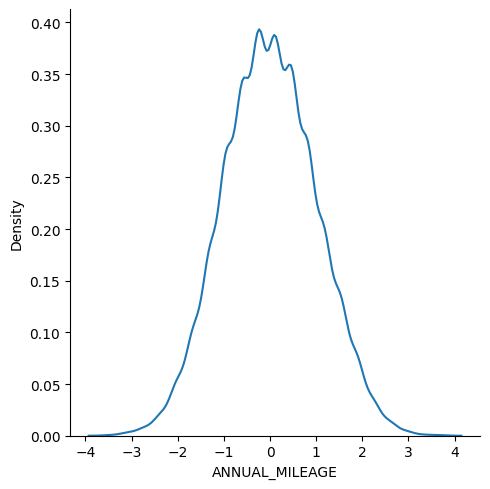

In [ ]:
std = np.std(df['ANNUAL_MILEAGE'])
mu = np.mean(df['ANNUAL_MILEAGE'])

x = (df['ANNUAL_MILEAGE'] - mu) / std
df['ANNUAL_MILEAGE'] = x
sns.displot(df, x='ANNUAL_MILEAGE', kind='kde')

In [ ]:
df.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,65+,...,poverty,working class,middle class,high school,none,university,after 2015,before 2015,sedan,sports car
0,0.629027,1.0,0.0,1.0,0.108618,0,0,0,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,0.357757,0.0,0.0,0.0,1.525963,0,0,0,1.0,0,...,1,0,0,0,1,0,0,1,1,0
2,0.493146,1.0,0.0,0.0,-0.245718,0,0,0,0.0,0,...,0,1,0,1,0,0,0,1,1,0
3,0.206013,1.0,0.0,1.0,-0.245718,0,0,0,0.0,0,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,1.0,0.0,0.0,0.108618,2,0,1,1.0,0,...,0,1,0,0,1,0,0,1,1,0


# Machine Learning Models

## General Code

In [ ]:
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             zero_one_loss,
                             ConfusionMatrixDisplay,
                             confusion_matrix, f1_score)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df.sample(frac=1)
X = df.drop('OUTCOME', axis=1)
Y = df['OUTCOME']
X.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,65+,16-25,...,poverty,working class,middle class,high school,none,university,after 2015,before 2015,sedan,sports car
0,0.629027,1.0,0.0,1.0,0.108618,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0.357757,0.0,0.0,0.0,1.525963,0,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
2,0.493146,1.0,0.0,0.0,-0.245718,0,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
3,0.206013,1.0,0.0,1.0,-0.245718,0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,1.0,0.0,0.0,0.108618,2,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [ ]:
from sklearn.utils import class_weight

Y.value_counts(normalize=True)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y), y=Y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(0.725904151077855), 1: np.float64(1.6066640378548895)}


In [ ]:
def plot_confussion_matrix(title, f1,conf_mat):
  displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
  displ.plot()
  plt.title(f'Confusion Matrix of {title} (F1 Score: {f1:.2f})')
  plt.show()

In [ ]:
def convert_for_prediction(arr):
  arr = (arr > 0.5).astype(int)
  return arr

In [ ]:
def show_confussion_matrix(model, X_test, y_test, title):
  predicted = model.predict(X_test)
  actual = np.array(y_test)
  actual = convert_for_prediction(actual)
  predicted = convert_for_prediction(predicted)
  conf_mat = confusion_matrix(actual, predicted)
  f1 = f1_score(actual, predicted)
  plot_confussion_matrix(title, f1, conf_mat)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=37)
logic_reg_model = LogisticRegression()
logic_reg_model.fit(X_train, y_train)

LogisticRegression()

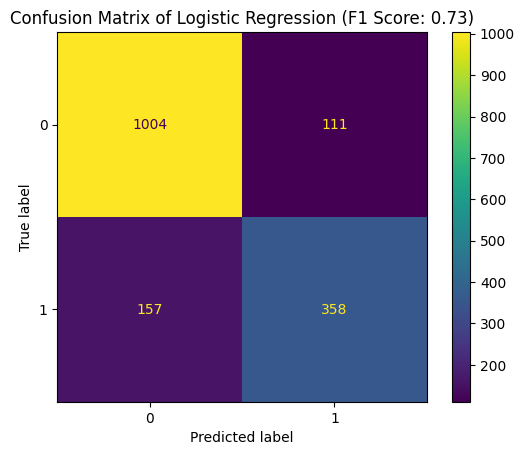

In [ ]:
show_confussion_matrix(logic_reg_model, X_test, y_test, 'Logistic Regression')

## Neural Network


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
def build_binary_class_model(input_shape):
  binary_class_model = Sequential()

  binary_class_model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
  binary_class_model.add(BatchNormalization())
  binary_class_model.add(Dropout(0.5))

  # binary_class_model.add(Dense(64, activation='relu'))
  # binary_class_model.add(BatchNormalization())
  # binary_class_model.add(Dropout(0.3))

  binary_class_model.add(Dense(32, activation='relu'))
  binary_class_model.add(BatchNormalization())

  binary_class_model.add(Dense(1, activation='sigmoid'))


  adam = keras.optimizers.Adam(learning_rate=0.0001)
  binary_class_model.compile(loss='binary_crossentropy',
                             optimizer=adam,
                             metrics = [
                                 'accuracy',
                      Precision(name='precision'),
                      Recall(name='recall'),
                      ]
                             )
  return binary_class_model


In [ ]:
kfold = KFold(n_splits = 10, shuffle = True, random_state=42)

X = np.array(X)
y = np.array(Y)


binary_class_model = build_binary_class_model( X_train.shape[1])
result_history = [{} for _ in range(10)]
fold_test_metrics = []
callback = EarlyStopping(patience=15, monitor='val_f1', mode='max', restore_best_weights=True)

for fold, (train_index, test_index) in enumerate(kfold.split(X)):
  binary_class_model = build_binary_class_model(X.shape[1])

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  history = binary_class_model.fit(X_train, y_train,
                                  validation_data=(X_test, y_test),
                                  batch_size=64,
                                  epochs=200,
                                  verbose=0,
                                  class_weight=class_weights,
                                  callbacks=[callback],

                                   )
  for key in history.history:
      result_history[fold][key] = history.history[key]
  test_result = binary_class_model.evaluate(X_test, y_test, verbose=0)
  fold_test_metrics.append(test_result)

  print(f"Fold {fold + 1} - Loss: {test_result[0]:.4f}, Accuracy: {test_result[1]:.4f}")
  result = binary_class_model.evaluate(X_test, y_test)
  fold_test_metrics.append(result)


Fold 1 - Loss: 0.4315, Accuracy: 0.8074
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4408 - precision: 0.6883 - recall: 0.7604 
Fold 2 - Loss: 0.3988, Accuracy: 0.8184
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8180 - loss: 0.4166 - precision: 0.6408 - recall: 0.8935
Fold 3 - Loss: 0.3876, Accuracy: 0.8454
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8486 - loss: 0.3765 - precision: 0.6992 - recall: 0.8704
Fold 4 - Loss: 0.4098, Accuracy: 0.8012
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.3751 - precision: 0.6514 - recall: 0.8007 
Fold 5 - Loss: 0.4033, Accuracy: 0.8221
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8118 - loss: 0.4126 - precision: 0.6718 - recall: 0.8227 
Fold 6 - Loss: 0.3501, Accuracy: 0.8442
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.3196 - precision: 0.7677 - recall: 0.8300 
Fold 7 - Loss: 0.3927, Accuracy: 0.8294
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.820

In [ ]:
metrics_df = pd.DataFrame()

for key in result_history[0].keys():
  data = []
  for fold in result_history:
    data.append(np.mean(fold[key]))
  metrics_df[key] = data

<Axes: ylabel='accuracy'>

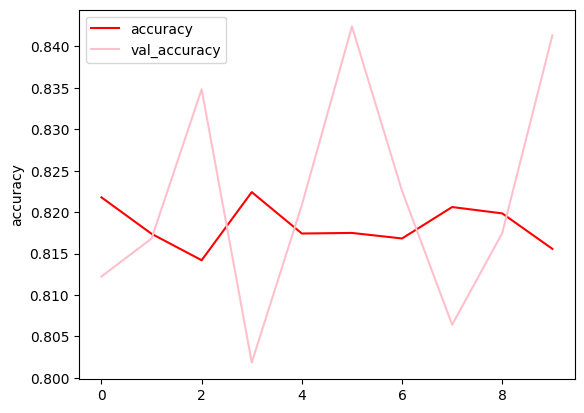

In [ ]:
sns.lineplot(data=metrics_df['accuracy'], color = 'red', label='accuracy')
sns.lineplot(data=metrics_df['val_accuracy'], color = 'pink', label='val_accuracy')

<Axes: ylabel='loss'>

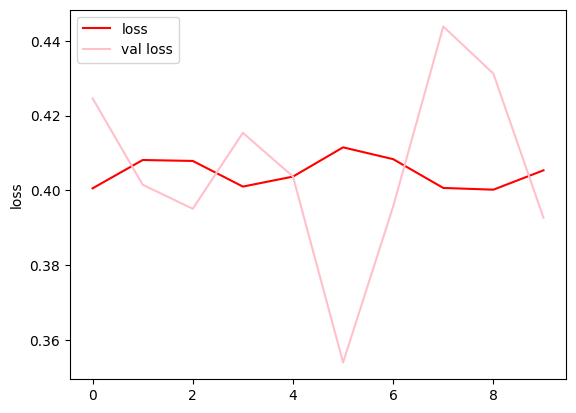

In [ ]:
sns.lineplot(data=metrics_df['loss'], color = 'red', label='loss')
sns.lineplot(data=metrics_df['val_loss'], color = 'pink', label='val loss')

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


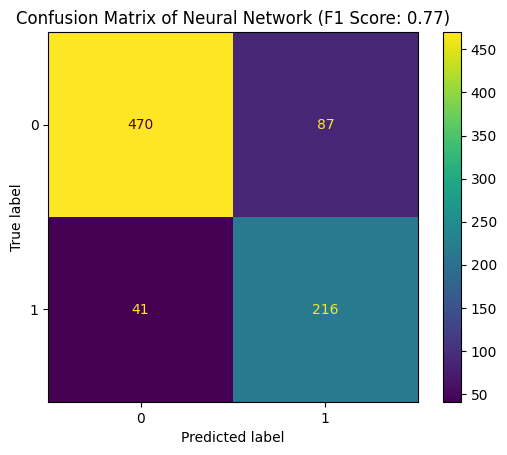

In [ ]:
show_confussion_matrix(binary_class_model, X_test, y_test, 'Neural Network')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=300,
                                       random_state=37,
                                       bootstrap=True,
                                       class_weight=class_weights,
                                       max_depth=200,
                                       max_features="sqrt",
                                       n_jobs=-1,
                                       )
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
zol = zero_one_loss(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Zero One Loss: {zol:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Zero One Loss: 0.16
Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       557
         1.0       0.79      0.67      0.72       257

    accuracy                           0.84       814
   macro avg       0.82      0.79      0.81       814
weighted avg       0.84      0.84      0.84       814



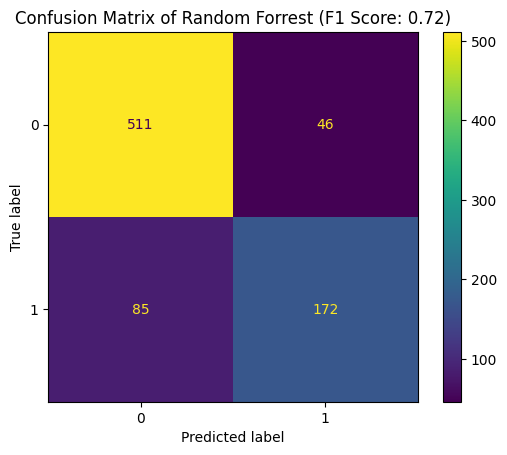

In [ ]:
show_confussion_matrix(rf_classifier, X_test, y_test, 'Random Forrest')

## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.base import clone

early_stop = xgb.callback.EarlyStopping(
    rounds=10, metric_name='logloss', data_name='validation_0', save_best=True
)
clf = xgb.XGBClassifier(tree_method="hist",
                        callbacks=[early_stop],
                        max_depth=20,
                        subsample=0.5,
                        verbosity=0,
                        class_weight=class_weights)

results = {}

def fit_and_score(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return estimator, train_score, test_score

for fold, (train_index, test_index) in enumerate(kfold.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  est, train_score, test_score = fit_and_score(
      clone(clf), X_train, X_test, y_train, y_test
  )
  print(f'{train_score=}', f'{test_score=}')
  results[est] = (train_score, test_score)


train_score=0.8856013089719117 test_score=0.8122699386503067
train_score=0.8963730569948186 test_score=0.8503067484662576
train_score=0.8881919825470411 test_score=0.8404907975460123
train_score=0.9014180529042815 test_score=0.8220858895705522
train_score=0.8888737387510226 test_score=0.8343558282208589
train_score=0.9010089991818926 test_score=0.852760736196319
train_score=0.8977365694027816 test_score=0.8245398773006135
train_score=0.8842377965639487 test_score=0.8122699386503067
train_score=0.8891464412326152 test_score=0.8233128834355828
train_score=0.8929788684389911 test_score=0.8353808353808354


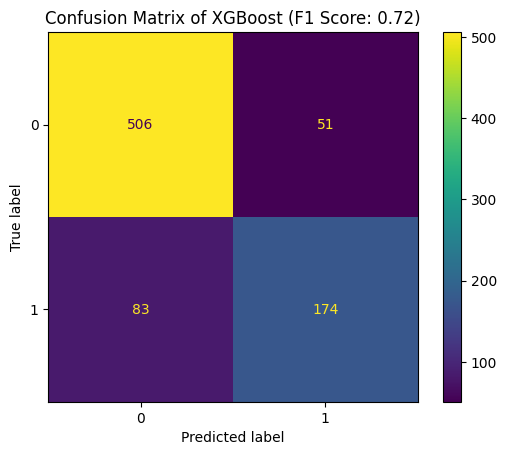

In [ ]:
show_confussion_matrix(est, X_test, y_test, 'XGBoost')

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, recall_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Crucial for KNN performance
    ('knn', KNeighborsClassifier())
])

# Hyperparameter grid
param_grid = {
    'knn__n_neighbors': np.arange(3, 21, 2),  # Test odd numbers from 3-19
    'knn__weights': ['uniform', 'distance'],    # Different weighting schemes
    'knn__metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Configure grid search with F1 scoring
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1 score
    cv=5,          # 5-fold cross-validation
)

# Execute grid search
grid_search.fit(X_train, y_train)

# Get best model
best_knn = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1: {grid_search.best_score_:.4f}")

# Test set evaluation
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Calculate metrics
metrics = {
    'f1': f1_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
}


Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': np.int64(9), 'knn__weights': 'uniform'}
Best cross-validation F1: 0.7013
